In [1]:
import os
import itertools, collections
import numpy, scipy, pandas
import scipy.signal
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from imp import reload

from pgtools import toolbox, myplots
import pygbrowse
import empdist
from empdist import EmpiricalDistribution
# from peas import scoring, arrayfuncs, choosing
import peas

In [2]:
def heatmap_centered_cmap(data, heatmap_kwargs={}):
    extent = numpy.max(numpy.abs(data))
    seaborn.heatmap(data, vmin=-extent, vmax=extent, cmap='RdBu_r', **heatmap_kwargs)

def plot_fit_params(param_dict, param_names, fig_height=3):
    param_df = pandas.DataFrame(param_dict, index=param_names).T

    fig, axes = plt.subplots(1, len(param_names), figsize=(fig_height*len(param_names),fig_height))
    for ax_idx, param_name in enumerate(param_names):
        axes[ax_idx].plot(param_df[param_name])
        axes[ax_idx].set_title(param_name)
        axes[ax_idx].set_ylabel('Value')
        axes[ax_idx].set_xlabel('Sample size')
    fig.tight_layout()
    return fig

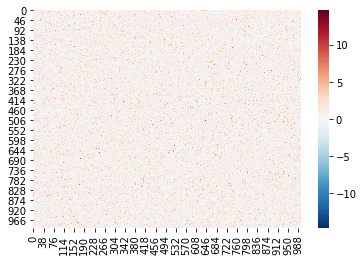

In [3]:
n=1000000
numpy.random.seed(1)
data_distro = scipy.stats.gumbel_r
test_data = data_distro().rvs(n)

test_matrix = test_data.reshape(1000,1000)
heatmap_centered_cmap(test_matrix)

In [4]:
%time ground_truth_means = peas.scoring.compute_mean_table_2d(test_matrix, start_diagonal=1, end_diagonal=500)


CPU times: user 70.2 ms, sys: 3.1 ms, total: 73.2 ms
Wall time: 71.5 ms


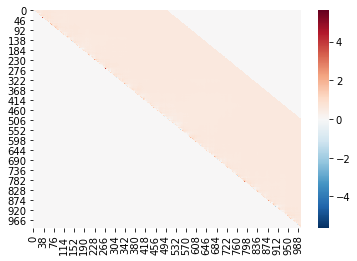

In [5]:
ground_truth_means = peas.scoring.compute_mean_table_2d(test_matrix, start_diagonal=1, end_diagonal=500)
heatmap_centered_cmap(ground_truth_means)

# Score by region mean

In [6]:
%%time
shuffled_means_ground_truth = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                  num_shuffles=1000,
                                                                  min_region_size=2,
                                                                  max_region_size=500,
                                                                  start_diagonal=1,
                                                                  matrix_score_func=peas.scoring.compute_mean_table_2d,
                                                                  random_seed=1,
                                                                 )

# %time shuffled_means_ground_truth = {size:numpy.sort(data) for size, data in shuffled_means_ground_truth.items()}

2018-Aug-29 16:39:27			Setting random seed to 1
2018-Aug-29 16:39:27				permutation 1 of 1000
2018-Aug-29 16:39:32				permutation 54 of 1000
2018-Aug-29 16:39:37				permutation 109 of 1000
2018-Aug-29 16:39:42				permutation 162 of 1000
2018-Aug-29 16:39:47				permutation 217 of 1000
2018-Aug-29 16:39:52				permutation 273 of 1000
2018-Aug-29 16:39:57				permutation 327 of 1000
2018-Aug-29 16:40:03				permutation 383 of 1000
2018-Aug-29 16:40:08				permutation 434 of 1000
2018-Aug-29 16:40:13				permutation 487 of 1000
2018-Aug-29 16:40:18				permutation 532 of 1000
2018-Aug-29 16:40:23				permutation 572 of 1000
2018-Aug-29 16:40:28				permutation 611 of 1000
2018-Aug-29 16:40:33				permutation 654 of 1000
2018-Aug-29 16:40:38				permutation 697 of 1000
2018-Aug-29 16:40:43				permutation 742 of 1000
2018-Aug-29 16:40:48				permutation 789 of 1000
2018-Aug-29 16:40:53				permutation 834 of 1000
2018-Aug-29 16:40:58				permutation 880 of 1000
2018-Aug-29 16:41:03				permutation 926 of 

In [7]:
from pgtools import toolbox
for size in shuffled_means_ground_truth:
    print(size)
    shuffled_means_ground_truth[size] = toolbox.replace_with_mem_map(arr=numpy.sort(shuffled_means_ground_truth[size]), 
                                                                     read_only=True, 
                                                                     tmp_dir='~/tmp')


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [8]:
%%time
shuffled_means_test = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                  num_shuffles=100,
                                                                  min_region_size=2,
                                                                  max_region_size=500,
                                                                  start_diagonal=1,
                                                                  matrix_score_func=peas.scoring.compute_mean_table_2d,
                                                                  random_seed=2,
                                                                 )

2018-Aug-29 16:41:53			Setting random seed to 2
2018-Aug-29 16:41:53				permutation 1 of 100
2018-Aug-29 16:41:58				permutation 49 of 100
2018-Aug-29 16:42:03				permutation 96 of 100
CPU times: user 10.3 s, sys: 137 ms, total: 10.5 s
Wall time: 10.7 s


In [9]:
%time shuffled_means_test = {size:toolbox.replace_with_mem_map(numpy.sort(data), read_only=True, tmp_dir='~/tmp') for size, data in shuffled_means_test.items()}

CPU times: user 4.5 s, sys: 361 ms, total: 4.86 s
Wall time: 8.39 s


In [10]:
reload(peas.scoring)
reload(peas.fitapproxdistros.helper_funcs)
reload(peas.fitapproxdistros.distributions)

<module 'peas.fitapproxdistros.distributions' from '/gpfs/data01/glasslab/home/dskola/workspace/PEAS/peas/fitapproxdistros/distributions.py'>

## Linear piecewise distribution

In [11]:
%%time
shuffled_distros_linear_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=peas.fitapproxdistros.distributions.PiecewiseApproxLinear,
                                                       parameter_smoothing_window_size=None,
                                                                               fit_kwargs={'is_sorted':True})

2018-Aug-29 16:42:12			size: 2 fit parameters: [-0.37890964 -0.90778486]
2018-Aug-29 16:42:12			size: 3 fit parameters: [ 0.19266767 -1.81026337]
2018-Aug-29 16:42:12			size: 4 fit parameters: [ 0.37143061 -2.7838965 ]
2018-Aug-29 16:42:12			size: 5 fit parameters: [ 0.43980007 -3.74672024]
2018-Aug-29 16:42:12			size: 6 fit parameters: [ 0.47819557 -4.71924505]
2018-Aug-29 16:42:12			size: 7 fit parameters: [ 0.4970075  -5.66057604]
2018-Aug-29 16:42:12			size: 8 fit parameters: [ 0.51112652 -6.63087836]
2018-Aug-29 16:42:12			size: 9 fit parameters: [ 0.52003558 -7.56076533]
2018-Aug-29 16:42:13			size: 10 fit parameters: [ 0.53059653 -8.54397457]
2018-Aug-29 16:42:13			size: 11 fit parameters: [ 0.53545931 -9.47207846]
2018-Aug-29 16:42:13			size: 12 fit parameters: [  0.54008917 -10.45632003]
2018-Aug-29 16:42:13			size: 13 fit parameters: [  0.54410811 -11.45156177]
2018-Aug-29 16:42:13			size: 14 fit parameters: [  0.54729563 -12.44284339]
2018-Aug-29 16:42:13			size: 15 fit para

2018-Aug-29 16:42:21			size: 113 fit parameters: [   0.57295374 -102.43681943]
2018-Aug-29 16:42:21			size: 114 fit parameters: [   0.57296628 -103.2680886 ]
2018-Aug-29 16:42:21			size: 115 fit parameters: [   0.57298843 -104.16286188]
2018-Aug-29 16:42:21			size: 116 fit parameters: [   0.57297027 -104.76717647]
2018-Aug-29 16:42:21			size: 117 fit parameters: [   0.57302783 -105.89751403]
2018-Aug-29 16:42:21			size: 118 fit parameters: [   0.57303965 -106.66573259]
2018-Aug-29 16:42:21			size: 119 fit parameters: [   0.57308739 -107.72150667]
2018-Aug-29 16:42:21			size: 120 fit parameters: [   0.57309837 -108.50923086]
2018-Aug-29 16:42:21			size: 121 fit parameters: [   0.57315806 -109.63718568]
2018-Aug-29 16:42:21			size: 122 fit parameters: [   0.5731835  -110.57148559]
2018-Aug-29 16:42:21			size: 123 fit parameters: [   0.57320799 -111.46039148]
2018-Aug-29 16:42:21			size: 124 fit parameters: [   0.57323093 -112.38203824]
2018-Aug-29 16:42:21			size: 125 fit parameters: [  

2018-Aug-29 16:42:28			size: 219 fit parameters: [   0.57423079 -193.11762823]
2018-Aug-29 16:42:28			size: 220 fit parameters: [   0.57423128 -193.66455516]
2018-Aug-29 16:42:28			size: 221 fit parameters: [   0.57425648 -194.81418559]
2018-Aug-29 16:42:28			size: 222 fit parameters: [   0.57427046 -195.81794201]
2018-Aug-29 16:42:29			size: 223 fit parameters: [   0.57427093 -196.45882377]
2018-Aug-29 16:42:29			size: 224 fit parameters: [   0.57427251 -197.03851106]
2018-Aug-29 16:42:29			size: 225 fit parameters: [   0.57428584 -197.91569296]
2018-Aug-29 16:42:29			size: 226 fit parameters: [   0.57429624 -198.78167776]
2018-Aug-29 16:42:29			size: 227 fit parameters: [   0.57428307 -198.95810573]
2018-Aug-29 16:42:29			size: 228 fit parameters: [   0.57429368 -199.78024596]
2018-Aug-29 16:42:29			size: 229 fit parameters: [   0.5742908  -200.36676684]
2018-Aug-29 16:42:29			size: 230 fit parameters: [   0.57430336 -201.1693786 ]
2018-Aug-29 16:42:29			size: 231 fit parameters: [  

2018-Aug-29 16:42:35			size: 323 fit parameters: [   0.57478687 -272.24765789]
2018-Aug-29 16:42:35			size: 324 fit parameters: [   0.57478921 -272.86862674]
2018-Aug-29 16:42:35			size: 325 fit parameters: [   0.57480563 -274.13855802]
2018-Aug-29 16:42:35			size: 326 fit parameters: [   0.57482771 -275.72252375]
2018-Aug-29 16:42:35			size: 327 fit parameters: [   0.57482566 -276.0448907 ]
2018-Aug-29 16:42:35			size: 328 fit parameters: [   0.57483535 -276.9820281 ]
2018-Aug-29 16:42:35			size: 329 fit parameters: [   0.57484945 -278.19750445]
2018-Aug-29 16:42:35			size: 330 fit parameters: [   0.57485643 -278.84191398]
2018-Aug-29 16:42:35			size: 331 fit parameters: [   0.57486205 -279.61691991]
2018-Aug-29 16:42:35			size: 332 fit parameters: [   0.57485902 -279.90141364]
2018-Aug-29 16:42:35			size: 333 fit parameters: [   0.57487677 -281.32469592]
2018-Aug-29 16:42:35			size: 334 fit parameters: [   0.57487968 -281.85054735]
2018-Aug-29 16:42:35			size: 335 fit parameters: [  

2018-Aug-29 16:42:40			size: 430 fit parameters: [   0.57552291 -376.2426656 ]
2018-Aug-29 16:42:40			size: 431 fit parameters: [   0.57552253 -376.80526392]
2018-Aug-29 16:42:40			size: 432 fit parameters: [   0.57552992 -378.22919177]
2018-Aug-29 16:42:40			size: 433 fit parameters: [   0.57552831 -378.71509404]
2018-Aug-29 16:42:40			size: 434 fit parameters: [   0.57553026 -379.5751488 ]
2018-Aug-29 16:42:40			size: 435 fit parameters: [   0.57553618 -380.6712781 ]
2018-Aug-29 16:42:41			size: 436 fit parameters: [   0.57553896 -381.58255672]
2018-Aug-29 16:42:41			size: 437 fit parameters: [   0.57554793 -383.28314962]
2018-Aug-29 16:42:41			size: 438 fit parameters: [   0.57555059 -384.20006925]
2018-Aug-29 16:42:41			size: 439 fit parameters: [   0.57555461 -385.28870215]
2018-Aug-29 16:42:41			size: 440 fit parameters: [   0.57555609 -386.28374563]
2018-Aug-29 16:42:41			size: 441 fit parameters: [   0.5755591  -387.25765347]
2018-Aug-29 16:42:41			size: 442 fit parameters: [  

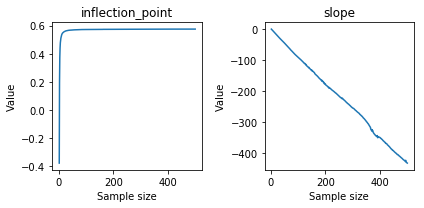

In [12]:
fig = plot_fit_params(shuffled_distros_linear_params, ['inflection_point', 'slope'])

In [13]:
predicted_mean_distros_linear = {size:peas.fitapproxdistros.distributions.PiecewiseApproxLinear(*params) for size, params in shuffled_distros_linear_params.items()}

## LinearDirect

In [14]:
%%time
shuffled_distros_lineardirect_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=peas.fitapproxdistros.distributions.PiecewiseApproxLinearDirect,
                                                       parameter_smoothing_window_size=None,
                                                                               fit_kwargs={'is_sorted':True})

Max examined data point: 5.559142762627303
2018-Aug-29 16:42:44			size: 2 fit parameters: (0.5833177599270974, -1.1099613741861034)
Max examined data point: 3.097319919246614
2018-Aug-29 16:42:44			size: 3 fit parameters: (0.5802910563327951, -2.1938453494756924)
Max examined data point: 2.2312969236415188
2018-Aug-29 16:42:44			size: 4 fit parameters: (0.5797737804947536, -3.342956223175013)
Max examined data point: 1.8000692687804694
2018-Aug-29 16:42:44			size: 5 fit parameters: (0.5795343957820805, -4.522579558282193)
Max examined data point: 1.569616933442118
2018-Aug-29 16:42:44			size: 6 fit parameters: (0.5793643513795406, -5.573286711317873)
Max examined data point: 1.3990312692456297
2018-Aug-29 16:42:44			size: 7 fit parameters: (0.5790932161040467, -6.7297230747181285)
Max examined data point: 1.2774762032624487
2018-Aug-29 16:42:44			size: 8 fit parameters: (0.5787830726433303, -7.89609810346572)
Max examined data point: 1.1890660952159744
2018-Aug-29 16:42:44			size: 9 fi

Max examined data point: 0.5915903446641755
2018-Aug-29 16:42:44			size: 327 fit parameters: (0.5766269194704581, -342.7994359773585)
Max examined data point: 0.5915578969767034
2018-Aug-29 16:42:44			size: 328 fit parameters: (0.5766288155590045, -343.4885787007772)
Max examined data point: 0.5915598952032869
2018-Aug-29 16:42:44			size: 329 fit parameters: (0.5766307823934478, -343.3882545977149)
Max examined data point: 0.591487763150675
2018-Aug-29 16:42:44			size: 330 fit parameters: (0.5766327108655849, -344.99998456635745)
Max examined data point: 0.5914440177187613
2018-Aug-29 16:42:44			size: 331 fit parameters: (0.5766345478071219, -345.9611611566322)
Max examined data point: 0.5913500602924407
2018-Aug-29 16:42:44			size: 332 fit parameters: (0.576636315798123, -348.1104200753186)
Max examined data point: 0.5913770545507447
2018-Aug-29 16:42:44			size: 333 fit parameters: (0.5766380796918565, -347.4130298481938)
Max examined data point: 0.5913184202932023
2018-Aug-29 16:42:4

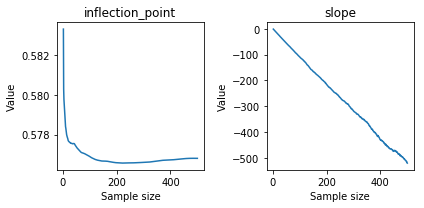

In [15]:
fig = plot_fit_params(shuffled_distros_lineardirect_params, ['inflection_point', 'slope'])

In [16]:
predicted_mean_distros_lineardirect = {size:peas.fitapproxdistros.distributions.PiecewiseApproxLinearDirect(*params) for size, params in shuffled_distros_lineardirect_params.items()}

## Piecewise power tail

In [17]:
%%time
shuffled_distros_power_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=peas.fitapproxdistros.distributions.PiecewiseApproxPower,
                                                       parameter_smoothing_window_size=None)

2018-Aug-29 16:42:44			size: 2 fit parameters: (-0.8206638352362993, 1.2279297237063287, -0.5674477736162754)
2018-Aug-29 16:42:44			size: 3 fit parameters: (-0.4315417360861419, 1.5600652156211239, -0.7722331910500648)
2018-Aug-29 16:42:44			size: 4 fit parameters: (-0.2577884733739989, 1.8252295586246132, -1.045085469929518)
2018-Aug-29 16:42:44			size: 5 fit parameters: (-0.15305754468061752, 2.041401480622611, -1.4074690471090778)
2018-Aug-29 16:42:44			size: 6 fit parameters: (-0.007102236245249078, 2.0442926475957184, -2.1756528987174035)
2018-Aug-29 16:42:44			size: 7 fit parameters: (0.0622749207992131, 2.133280290615274, -2.9708001975212643)
2018-Aug-29 16:42:44			size: 8 fit parameters: (0.11304864156694748, 2.22254501298331, -3.9333360622756763)
2018-Aug-29 16:42:44			size: 9 fit parameters: (0.16279974375648745, 2.2556093857915602, -5.202610622739738)
2018-Aug-29 16:42:44			size: 10 fit parameters: (0.19540236499654823, 2.303719163223226, -6.587329326349845)
2018-Aug-29 16:

2018-Aug-29 16:42:47			size: 82 fit parameters: (0.5305741701852322, 2.470584025311146, -1355.7762593427608)
2018-Aug-29 16:42:47			size: 83 fit parameters: (0.5300287747221483, 2.5115875317411622, -1501.9452609264472)
2018-Aug-29 16:42:47			size: 84 fit parameters: (0.529964057261145, 2.538860989998381, -1627.270058111121)
2018-Aug-29 16:42:47			size: 85 fit parameters: (0.5312769776178812, 2.5087043660597423, -1587.557015040226)
2018-Aug-29 16:42:47			size: 86 fit parameters: (0.5325631689956535, 2.4790601792828397, -1546.0501360922538)
2018-Aug-29 16:42:47			size: 87 fit parameters: (0.5326912129722653, 2.4956136986461, -1645.239284606334)
2018-Aug-29 16:42:47			size: 88 fit parameters: (0.533851940520686, 2.4702264551848363, -1611.4396623604675)
2018-Aug-29 16:42:47			size: 89 fit parameters: (0.534442444329844, 2.463144951578757, -1640.2086190681362)
2018-Aug-29 16:42:47			size: 90 fit parameters: (0.5350428956751185, 2.454117533912362, -1659.6010335339715)
2018-Aug-29 16:42:47			

2018-Aug-29 16:42:49			size: 159 fit parameters: (0.5519026428451499, 2.477836388739526, -6887.901788729054)
2018-Aug-29 16:42:49			size: 160 fit parameters: (0.5519773144976343, 2.4833871588154985, -7069.932587801376)
2018-Aug-29 16:42:50			size: 161 fit parameters: (0.5521598816307141, 2.480207955195077, -7097.394217116889)
2018-Aug-29 16:42:50			size: 162 fit parameters: (0.5523720479259062, 2.4756673321801874, -7100.665274933856)
2018-Aug-29 16:42:50			size: 163 fit parameters: (0.5527184646416484, 2.4608694514968583, -6994.623052893607)
2018-Aug-29 16:42:50			size: 164 fit parameters: (0.5528864557151676, 2.4594789803863986, -7057.711049033006)
2018-Aug-29 16:42:50			size: 165 fit parameters: (0.553253934373834, 2.4417916398569943, -6868.375188756091)
2018-Aug-29 16:42:50			size: 166 fit parameters: (0.5537735119488418, 2.412930290563375, -6493.284119103663)
2018-Aug-29 16:42:50			size: 167 fit parameters: (0.5542720939883184, 2.385195829292863, -6160.053552220193)
2018-Aug-29 16:

2018-Aug-29 16:42:52			size: 239 fit parameters: (0.5607246332828416, 2.375250093214641, -13619.43609682535)
2018-Aug-29 16:42:52			size: 240 fit parameters: (0.5606269969107428, 2.3907069671487404, -14303.172649530581)
2018-Aug-29 16:42:52			size: 241 fit parameters: (0.5605063697728287, 2.4100519760047283, -15215.96438044452)
2018-Aug-29 16:42:52			size: 242 fit parameters: (0.5606883690695025, 2.398018391086102, -14786.585026246967)
2018-Aug-29 16:42:52			size: 243 fit parameters: (0.560686395184551, 2.4043065824069205, -15234.43875129418)
2018-Aug-29 16:42:52			size: 244 fit parameters: (0.5606850163777579, 2.412486816250225, -15731.381512812804)
2018-Aug-29 16:42:52			size: 245 fit parameters: (0.5605453453994049, 2.433978673597328, -16881.24345180938)
2018-Aug-29 16:42:52			size: 246 fit parameters: (0.5604411662608398, 2.45238294176446, -17977.86903599378)
2018-Aug-29 16:42:52			size: 247 fit parameters: (0.5603956423226345, 2.4650305543561255, -18734.206918466927)
2018-Aug-29 1

2018-Aug-29 16:42:55			size: 321 fit parameters: (0.5646835456726483, 2.3744808751362694, -26797.21531795577)
2018-Aug-29 16:42:55			size: 322 fit parameters: (0.5647756828778351, 2.3674517138110516, -26431.07626020802)
2018-Aug-29 16:42:55			size: 323 fit parameters: (0.5647645869431811, 2.375149413260575, -27355.242580790065)
2018-Aug-29 16:42:55			size: 324 fit parameters: (0.564846287802941, 2.3692961296890647, -27129.33855766814)
2018-Aug-29 16:42:55			size: 325 fit parameters: (0.5648996104446, 2.3679382131171574, -27139.59985518457)
2018-Aug-29 16:42:55			size: 326 fit parameters: (0.5649873370063622, 2.361028519024519, -26580.74766644567)
2018-Aug-29 16:42:55			size: 327 fit parameters: (0.5649905188746998, 2.366739964833098, -27414.064307624845)
2018-Aug-29 16:42:55			size: 328 fit parameters: (0.5650355170051787, 2.365595245108946, -27481.48389684474)
2018-Aug-29 16:42:55			size: 329 fit parameters: (0.5651467902206259, 2.3550517113774276, -26700.305063935088)
2018-Aug-29 16:

2018-Aug-29 16:42:57			size: 398 fit parameters: (0.5645002567085642, 2.939731534395938, -290674.2181779958)
2018-Aug-29 16:42:57			size: 399 fit parameters: (0.5644852928757764, 2.94799943112632, -301134.9943073317)
2018-Aug-29 16:42:57			size: 400 fit parameters: (0.5645567161195848, 2.9388749990950775, -294592.2679152284)
2018-Aug-29 16:42:57			size: 401 fit parameters: (0.5645490033889287, 2.945732148059163, -302854.85045037116)
2018-Aug-29 16:42:57			size: 402 fit parameters: (0.5647842821111021, 2.9064932806662083, -268107.0612152267)
2018-Aug-29 16:42:57			size: 403 fit parameters: (0.5647414077383531, 2.9194826373524925, -282358.44625124324)
2018-Aug-29 16:42:57			size: 404 fit parameters: (0.5648933760774962, 2.896356423576232, -263796.2437153142)
2018-Aug-29 16:42:57			size: 405 fit parameters: (0.565054277050511, 2.871875747221435, -246689.14527732285)
2018-Aug-29 16:42:57			size: 406 fit parameters: (0.565308912622785, 2.829690231060036, -216597.92940942827)
2018-Aug-29 16:

2018-Aug-29 16:42:59			size: 476 fit parameters: (0.5708626260091995, 1.9946173977335286, -18971.57581305626)
2018-Aug-29 16:42:59			size: 477 fit parameters: (0.5709213656073071, 1.9836379694801638, -18243.125485961176)
2018-Aug-29 16:42:59			size: 478 fit parameters: (0.570952544396954, 1.9790747396283963, -18012.980217777702)
2018-Aug-29 16:42:59			size: 479 fit parameters: (0.5709699471757442, 1.977246081818113, -17981.45639087921)
2018-Aug-29 16:42:59			size: 480 fit parameters: (0.5709850697702785, 1.977020958954219, -18057.51412499496)
2018-Aug-29 16:42:59			size: 481 fit parameters: (0.5710074471432767, 1.9735544714398037, -17907.1406803584)
2018-Aug-29 16:42:59			size: 482 fit parameters: (0.5710496634890011, 1.966999269539736, -17497.694770712522)
2018-Aug-29 16:42:59			size: 483 fit parameters: (0.5710363067732059, 1.9723619242715853, -17950.003047434377)
2018-Aug-29 16:42:59			size: 484 fit parameters: (0.5710798095262215, 1.9645511328692722, -17471.981184856908)
2018-Aug-2

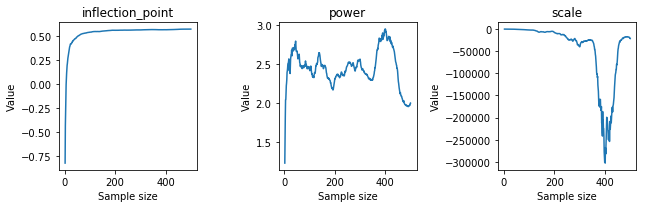

In [18]:
fig = plot_fit_params(shuffled_distros_power_params, ['inflection_point', 'power', 'scale'])

In [19]:
predicted_mean_distros_power = {size:peas.fitapproxdistros.distributions.PiecewiseApproxPower(*params) for size, params in shuffled_distros_power_params.items()}

## Analytical normal

In [20]:
%%time
shuffled_distros_norm_params = peas.fitapproxdistros.helper_funcs.fit_distros(shuffled_means_test, 
                                                       distribution_class=scipy.stats.norm,
                                                       parameter_smoothing_window_size=None)

2018-Aug-29 16:43:00			size: 2 fit parameters: (0.5833177599270974, 1.288308921073225)
2018-Aug-29 16:43:00			size: 3 fit parameters: (0.5802910563327951, 0.7446617038224108)
2018-Aug-29 16:43:00			size: 4 fit parameters: (0.5797737804947536, 0.5266223288934093)
2018-Aug-29 16:43:00			size: 5 fit parameters: (0.5795343957820805, 0.40735110742244757)
2018-Aug-29 16:43:00			size: 6 fit parameters: (0.5793643513795406, 0.33212713699377233)
2018-Aug-29 16:43:00			size: 7 fit parameters: (0.5790932161040467, 0.28072184885142015)
2018-Aug-29 16:43:00			size: 8 fit parameters: (0.5787830726433303, 0.24319963385143187)
2018-Aug-29 16:43:00			size: 9 fit parameters: (0.5784968848237733, 0.214602423562712)
2018-Aug-29 16:43:00			size: 10 fit parameters: (0.578402464920227, 0.19203944995372021)
2018-Aug-29 16:43:00			size: 11 fit parameters: (0.5783229706622179, 0.17376990583204904)
2018-Aug-29 16:43:00			size: 12 fit parameters: (0.5782008971338934, 0.15864682513240422)
2018-Aug-29 16:43:00			si

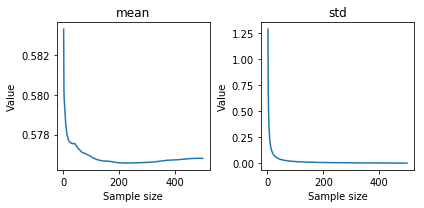

In [21]:
fig = plot_fit_params(shuffled_distros_norm_params, ['mean', 'std'])

In [22]:
predicted_mean_distros_norm = {size:scipy.stats.norm(*params) for size, params in shuffled_distros_norm_params.items()}

## Evaluate

In [23]:
def rms(X, Y):
    return numpy.sqrt(numpy.mean((X - Y)**2))


def determine_max_test_value(empirical_sample):
    return empdist.empirical_pval.compute_empirical_quantile(data=empirical_sample, 
                                                             q=1-empdist.empirical_pval.compute_p_confidence(len(empirical_sample)), 
                                                             is_sorted=True)
    
    
def evaluate_fits(size, ground_truth_shuffled_data, distros_by_size, test_vector):

    ground_truth_empirical_pvalues = empdist.empirical_pval.compute_empirical_pvalue(ground_truth_shuffled_data[size],
                                                                             test_vector, tail='right', 
                                                                              is_sorted=True)
    ground_truth_empirical_pscores = -10 * numpy.log(ground_truth_empirical_pvalues)
    test_pscores = -10 * distros_by_size[size].logsf(test_vector)
    
    return test_vector, ground_truth_empirical_pscores, test_pscores

In [159]:
size = 495
min_size = min(numpy.diag(ground_truth_means, size-1))
max_size = determine_max_test_value(shuffled_means_ground_truth[size])
print('Maximum tested value: {}'.format(max_size))
test_vector = numpy.linspace(min_size, max_size, num=100)

Maximum tested value: 0.5883201540716186


RMS: 5.403815578617146


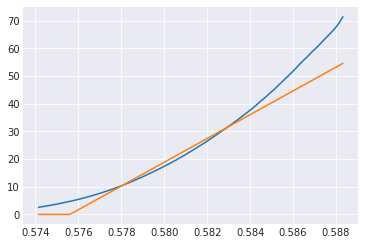

In [160]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_linear, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

RMS: 4.6346985930958216


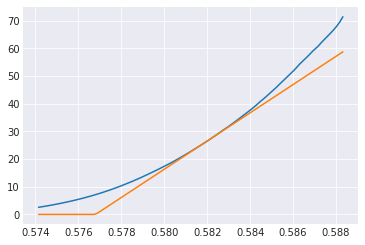

In [161]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_lineardirect, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

RMS: 3.34703728040608


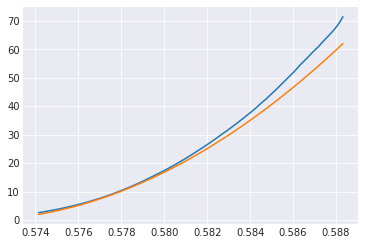

In [162]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_power, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

RMS: 0.5136469765114396


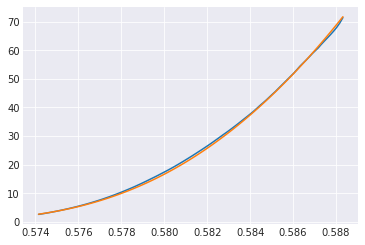

In [163]:
test_xs, true_ys, predicted_ys = evaluate_fits(size, shuffled_means_ground_truth, predicted_mean_distros_norm, test_vector)

plt.plot(test_xs, true_ys)
plt.plot(test_xs, predicted_ys)
print('RMS: {}'.format(rms(true_ys, predicted_ys)))

## Test fits systematically across distribution types

In [29]:
from peas.utilities import log_print

In [32]:
distro_collections = {'analytical_norm':predicted_mean_distros_norm, 
                      'pw_linear': predicted_mean_distros_linear,
                      'pw_lineardirect':predicted_mean_distros_lineardirect,
                      'pw_power':predicted_mean_distros_power}

all_distro_rms = collections.defaultdict(lambda: {})
for size in range(2, 501):
    min_size = min(numpy.diag(test_matrix, size-1))
    max_size = determine_max_test_value(shuffled_means_ground_truth[size])
    print('Maximum tested value: {}'.format(max_size))
    test_vector = numpy.linspace(min_size, max_size, num=100)
    ground_truth_empirical_pvalues = empdist.empirical_pval.compute_empirical_pvalue(shuffled_means_ground_truth[size],
                                                                             test_vector, tail='right', 
                                                                              is_sorted=True)
    
    ground_truth_empirical_pscores = -10 * numpy.log(ground_truth_empirical_pvalues)

    for distro_name, distro_set in distro_collections.items():
        predicted_pscores = -10 * distro_set[size].logsf(test_vector)        
        this_rms = rms(ground_truth_empirical_pscores, predicted_pscores)
        all_distro_rms[distro_name][size] = this_rms
        log_print((distro_name, size, this_rms))

Maximum tested value: 7.719854687296676
2018-Aug-29 16:47:46	('analytical_norm', 2, 36.536133322211036)
2018-Aug-29 16:47:46	('pw_linear', 2, 1.80883914948697)
2018-Aug-29 16:47:46	('pw_lineardirect', 2, 3.5288716952437094)
2018-Aug-29 16:47:46	('pw_power', 2, 0.5543844678452283)
Maximum tested value: 3.9714587123429297
2018-Aug-29 16:47:47	('analytical_norm', 3, 15.19924056527266)
2018-Aug-29 16:47:47	('pw_linear', 3, 2.961244334128259)
2018-Aug-29 16:47:47	('pw_lineardirect', 3, 2.641427522084932)
2018-Aug-29 16:47:47	('pw_power', 3, 0.665201079495064)
Maximum tested value: 2.787890564167048
2018-Aug-29 16:47:48	('analytical_norm', 4, 9.22210361219571)
2018-Aug-29 16:47:48	('pw_linear', 4, 3.0688802809296716)
2018-Aug-29 16:47:48	('pw_lineardirect', 4, 2.332403054801609)
2018-Aug-29 16:47:48	('pw_power', 4, 0.48395123779262134)
Maximum tested value: 2.2114408695817853
2018-Aug-29 16:47:49	('analytical_norm', 5, 6.587250660187946)
2018-Aug-29 16:47:49	('pw_linear', 5, 3.01131962573733

2018-Aug-29 16:48:09	('analytical_norm', 31, 0.1263562153478039)
2018-Aug-29 16:48:09	('pw_linear', 31, 1.9787203481758928)
2018-Aug-29 16:48:09	('pw_lineardirect', 31, 1.3561118426312275)
2018-Aug-29 16:48:09	('pw_power', 31, 0.26509329216579364)
Maximum tested value: 0.7735342713834188
2018-Aug-29 16:48:10	('analytical_norm', 32, 0.12350636122553836)
2018-Aug-29 16:48:10	('pw_linear', 32, 1.965056675580157)
2018-Aug-29 16:48:10	('pw_lineardirect', 32, 1.3234649802328393)
2018-Aug-29 16:48:10	('pw_power', 32, 0.10669226309325226)
Maximum tested value: 0.7674930749662688
2018-Aug-29 16:48:11	('analytical_norm', 33, 0.12549778333055053)
2018-Aug-29 16:48:11	('pw_linear', 33, 1.961057582617289)
2018-Aug-29 16:48:11	('pw_lineardirect', 33, 1.3399278195031261)
2018-Aug-29 16:48:11	('pw_power', 33, 0.1825040082353811)
Maximum tested value: 0.7625766335522133
2018-Aug-29 16:48:12	('analytical_norm', 34, 0.1665165154309783)
2018-Aug-29 16:48:12	('pw_linear', 34, 1.9309306263795307)
2018-Aug-2

Maximum tested value: 0.6820716361961338
2018-Aug-29 16:48:35	('analytical_norm', 60, 0.266800480745561)
2018-Aug-29 16:48:35	('pw_linear', 60, 1.7228430331586095)
2018-Aug-29 16:48:35	('pw_lineardirect', 60, 1.0438556914269597)
2018-Aug-29 16:48:35	('pw_power', 60, 0.18691190229600116)
Maximum tested value: 0.6797528386673312
2018-Aug-29 16:48:36	('analytical_norm', 61, 0.19920043256114012)
2018-Aug-29 16:48:36	('pw_linear', 61, 1.747913759970661)
2018-Aug-29 16:48:36	('pw_lineardirect', 61, 1.1580381125356054)
2018-Aug-29 16:48:36	('pw_power', 61, 0.26241576315496873)
Maximum tested value: 0.6781728624693294
2018-Aug-29 16:48:37	('analytical_norm', 62, 0.21192123584872694)
2018-Aug-29 16:48:37	('pw_linear', 62, 1.7368652561687283)
2018-Aug-29 16:48:37	('pw_lineardirect', 62, 1.1153935150126006)
2018-Aug-29 16:48:37	('pw_power', 62, 0.2836569935315029)
Maximum tested value: 0.6763215608351578
2018-Aug-29 16:48:38	('analytical_norm', 63, 0.18837003542359007)
2018-Aug-29 16:48:38	('pw_l

Maximum tested value: 0.6448967202771962
2018-Aug-29 16:49:05	('analytical_norm', 89, 0.21458609203995258)
2018-Aug-29 16:49:05	('pw_linear', 89, 1.7871226302374474)
2018-Aug-29 16:49:05	('pw_lineardirect', 89, 1.2068131094878245)
2018-Aug-29 16:49:05	('pw_power', 89, 0.5439122802015056)
Maximum tested value: 0.6441544108558221
2018-Aug-29 16:49:06	('analytical_norm', 90, 0.20809697311896766)
2018-Aug-29 16:49:06	('pw_linear', 90, 1.7681367599814728)
2018-Aug-29 16:49:06	('pw_lineardirect', 90, 1.174170617362624)
2018-Aug-29 16:49:06	('pw_power', 90, 0.5231950207039391)
Maximum tested value: 0.6432733587638496
2018-Aug-29 16:49:07	('analytical_norm', 91, 0.22811751834134503)
2018-Aug-29 16:49:07	('pw_linear', 91, 1.7694724186131385)
2018-Aug-29 16:49:07	('pw_lineardirect', 91, 1.2108141755395732)
2018-Aug-29 16:49:07	('pw_power', 91, 0.5843040023715784)
Maximum tested value: 0.6426908096655095
2018-Aug-29 16:49:08	('analytical_norm', 92, 0.2069700524197466)
2018-Aug-29 16:49:08	('pw_li

Maximum tested value: 0.6285204591654797
2018-Aug-29 16:49:33	('analytical_norm', 118, 0.06833279120071868)
2018-Aug-29 16:49:33	('pw_linear', 118, 1.8300386925527996)
2018-Aug-29 16:49:33	('pw_lineardirect', 118, 1.3195578660048601)
2018-Aug-29 16:49:33	('pw_power', 118, 0.5982451402043548)
Maximum tested value: 0.6282233190119649
2018-Aug-29 16:49:34	('analytical_norm', 119, 0.03652853012946822)
2018-Aug-29 16:49:34	('pw_linear', 119, 1.8238780487903126)
2018-Aug-29 16:49:34	('pw_lineardirect', 119, 1.2499212961616766)
2018-Aug-29 16:49:34	('pw_power', 119, 0.5785553758505397)
Maximum tested value: 0.6278245529543206
2018-Aug-29 16:49:35	('analytical_norm', 120, 0.04007617357936739)
2018-Aug-29 16:49:35	('pw_linear', 120, 1.7664547290343633)
2018-Aug-29 16:49:35	('pw_lineardirect', 120, 1.2264504262803537)
2018-Aug-29 16:49:35	('pw_power', 120, 0.5195865766111627)
Maximum tested value: 0.6273631567082896
2018-Aug-29 16:49:36	('analytical_norm', 121, 0.03650568165210842)
2018-Aug-29 1

2018-Aug-29 16:50:00	('analytical_norm', 146, 0.08481824770091456)
2018-Aug-29 16:50:00	('pw_linear', 146, 1.8090122812490361)
2018-Aug-29 16:50:00	('pw_lineardirect', 146, 1.065321554515093)
2018-Aug-29 16:50:00	('pw_power', 146, 0.37178185038869943)
Maximum tested value: 0.6181833889054164
2018-Aug-29 16:50:01	('analytical_norm', 147, 0.02722392904429803)
2018-Aug-29 16:50:01	('pw_linear', 147, 1.7810619570396762)
2018-Aug-29 16:50:01	('pw_lineardirect', 147, 1.0171445849784642)
2018-Aug-29 16:50:01	('pw_power', 147, 0.31923753559140244)
Maximum tested value: 0.617890454307478
2018-Aug-29 16:50:02	('analytical_norm', 148, 0.03076691151677602)
2018-Aug-29 16:50:02	('pw_linear', 148, 1.7940131077278976)
2018-Aug-29 16:50:02	('pw_lineardirect', 148, 1.0247192296064682)
2018-Aug-29 16:50:02	('pw_power', 148, 0.28347826495941564)
Maximum tested value: 0.6177642212260059
2018-Aug-29 16:50:03	('analytical_norm', 149, 0.022349225011814515)
2018-Aug-29 16:50:03	('pw_linear', 149, 1.7801294604

2018-Aug-29 16:50:25	('analytical_norm', 174, 0.38057050093116584)
2018-Aug-29 16:50:25	('pw_linear', 174, 1.5918982399220887)
2018-Aug-29 16:50:25	('pw_lineardirect', 174, 0.900734469337564)
2018-Aug-29 16:50:25	('pw_power', 174, 0.1770600696467193)
Maximum tested value: 0.6125455882594666
2018-Aug-29 16:50:26	('analytical_norm', 175, 0.36143090699012026)
2018-Aug-29 16:50:26	('pw_linear', 175, 1.584878435766165)
2018-Aug-29 16:50:26	('pw_lineardirect', 175, 0.8875385573775824)
2018-Aug-29 16:50:26	('pw_power', 175, 0.20999640162191488)
Maximum tested value: 0.6123074326524168
2018-Aug-29 16:50:27	('analytical_norm', 176, 0.3533330325304695)
2018-Aug-29 16:50:27	('pw_linear', 176, 1.601351397240491)
2018-Aug-29 16:50:27	('pw_lineardirect', 176, 0.9403408175167753)
2018-Aug-29 16:50:27	('pw_power', 176, 0.24126538756831975)
Maximum tested value: 0.6121009703671888
2018-Aug-29 16:50:28	('analytical_norm', 177, 0.35472077344773645)
2018-Aug-29 16:50:28	('pw_linear', 177, 1.59788297452724

2018-Aug-29 16:50:50	('analytical_norm', 203, 0.16588492735508983)
2018-Aug-29 16:50:50	('pw_linear', 203, 1.6707956363563625)
2018-Aug-29 16:50:50	('pw_lineardirect', 203, 0.970355462938731)
2018-Aug-29 16:50:50	('pw_power', 203, 0.33998700713540414)
Maximum tested value: 0.6067291669082672
2018-Aug-29 16:50:51	('analytical_norm', 204, 0.17343226090697672)
2018-Aug-29 16:50:51	('pw_linear', 204, 1.6686101899324892)
2018-Aug-29 16:50:51	('pw_lineardirect', 204, 0.9978179999010082)
2018-Aug-29 16:50:51	('pw_power', 204, 0.31246984127325195)
Maximum tested value: 0.6065289890830264
2018-Aug-29 16:50:52	('analytical_norm', 205, 0.15422538514466244)
2018-Aug-29 16:50:52	('pw_linear', 205, 1.6804388760788282)
2018-Aug-29 16:50:52	('pw_lineardirect', 205, 0.9964279410426997)
2018-Aug-29 16:50:52	('pw_power', 205, 0.31755832115685334)
Maximum tested value: 0.6063833055620061
2018-Aug-29 16:50:53	('analytical_norm', 206, 0.15668601579142225)
2018-Aug-29 16:50:53	('pw_linear', 206, 1.6875108416

Maximum tested value: 0.6031253223997564
2018-Aug-29 16:51:15	('analytical_norm', 232, 0.2217158640292108)
2018-Aug-29 16:51:15	('pw_linear', 232, 1.7223475691514312)
2018-Aug-29 16:51:15	('pw_lineardirect', 232, 1.011850093635377)
2018-Aug-29 16:51:15	('pw_power', 232, 0.3427033204129981)
Maximum tested value: 0.6030384723888695
2018-Aug-29 16:51:16	('analytical_norm', 233, 0.23360415699534523)
2018-Aug-29 16:51:16	('pw_linear', 233, 1.7121066527032291)
2018-Aug-29 16:51:16	('pw_lineardirect', 233, 1.081616435613084)
2018-Aug-29 16:51:16	('pw_power', 233, 0.35230320994889375)
Maximum tested value: 0.6028902259989402
2018-Aug-29 16:51:17	('analytical_norm', 234, 0.217159873909491)
2018-Aug-29 16:51:17	('pw_linear', 234, 1.7380329882268872)
2018-Aug-29 16:51:17	('pw_lineardirect', 234, 1.1900242901804772)
2018-Aug-29 16:51:17	('pw_power', 234, 0.3720112718380513)
Maximum tested value: 0.602777240353423
2018-Aug-29 16:51:17	('analytical_norm', 235, 0.2169777615817106)
2018-Aug-29 16:51:1

2018-Aug-29 16:51:38	('analytical_norm', 260, 0.06311706147223209)
2018-Aug-29 16:51:38	('pw_linear', 260, 1.8884070462882758)
2018-Aug-29 16:51:38	('pw_lineardirect', 260, 1.170012008303618)
2018-Aug-29 16:51:38	('pw_power', 260, 0.45877342158258094)
Maximum tested value: 0.5997887859895237
2018-Aug-29 16:51:39	('analytical_norm', 261, 0.06664394097376446)
2018-Aug-29 16:51:39	('pw_linear', 261, 1.8471741414264662)
2018-Aug-29 16:51:39	('pw_lineardirect', 261, 1.1156504501403524)
2018-Aug-29 16:51:39	('pw_power', 261, 0.4755812131362989)
Maximum tested value: 0.59969366972964
2018-Aug-29 16:51:40	('analytical_norm', 262, 0.06350010434723308)
2018-Aug-29 16:51:40	('pw_linear', 262, 1.8629293121373742)
2018-Aug-29 16:51:40	('pw_lineardirect', 262, 1.0969810823385946)
2018-Aug-29 16:51:40	('pw_power', 262, 0.48449386808789313)
Maximum tested value: 0.5995829300306271
2018-Aug-29 16:51:40	('analytical_norm', 263, 0.055538584498405714)
2018-Aug-29 16:51:40	('pw_linear', 263, 1.894560094047

2018-Aug-29 16:52:01	('analytical_norm', 289, 0.0849625683877866)
2018-Aug-29 16:52:01	('pw_linear', 289, 1.9093234949941542)
2018-Aug-29 16:52:01	('pw_lineardirect', 289, 1.2031178446415025)
2018-Aug-29 16:52:01	('pw_power', 289, 0.6609492858993143)
Maximum tested value: 0.5971503855368919
2018-Aug-29 16:52:02	('analytical_norm', 290, 0.08884202756951222)
2018-Aug-29 16:52:02	('pw_linear', 290, 1.9367143625770924)
2018-Aug-29 16:52:02	('pw_lineardirect', 290, 1.2128706812238719)
2018-Aug-29 16:52:02	('pw_power', 290, 0.6206883047164776)
Maximum tested value: 0.597029075704123
2018-Aug-29 16:52:03	('analytical_norm', 291, 0.11698634942132059)
2018-Aug-29 16:52:03	('pw_linear', 291, 1.9319322274710815)
2018-Aug-29 16:52:03	('pw_lineardirect', 291, 1.1921575487212117)
2018-Aug-29 16:52:03	('pw_power', 291, 0.6179933400100708)
Maximum tested value: 0.5969677137335432
2018-Aug-29 16:52:03	('analytical_norm', 292, 0.11336401814900685)
2018-Aug-29 16:52:03	('pw_linear', 292, 1.93874590579214

2018-Aug-29 16:52:23	('analytical_norm', 318, 0.23231059290535755)
2018-Aug-29 16:52:23	('pw_linear', 318, 1.9757625020352196)
2018-Aug-29 16:52:23	('pw_lineardirect', 318, 1.304359094079085)
2018-Aug-29 16:52:23	('pw_power', 318, 0.8594398945871204)
Maximum tested value: 0.5950437807029533
2018-Aug-29 16:52:24	('analytical_norm', 319, 0.2265278536333258)
2018-Aug-29 16:52:24	('pw_linear', 319, 1.9799308610182131)
2018-Aug-29 16:52:24	('pw_lineardirect', 319, 1.2867006407783934)
2018-Aug-29 16:52:24	('pw_power', 319, 0.8318251432538428)
Maximum tested value: 0.5949659853333911
2018-Aug-29 16:52:25	('analytical_norm', 320, 0.23824422247177465)
2018-Aug-29 16:52:25	('pw_linear', 320, 1.9865983429849208)
2018-Aug-29 16:52:25	('pw_lineardirect', 320, 1.2792237757279776)
2018-Aug-29 16:52:25	('pw_power', 320, 0.830755180129567)
Maximum tested value: 0.5949826713324773
2018-Aug-29 16:52:25	('analytical_norm', 321, 0.19363535545891505)
2018-Aug-29 16:52:25	('pw_linear', 321, 1.964944707281145

2018-Aug-29 16:52:44	('analytical_norm', 347, 0.26961108599293115)
2018-Aug-29 16:52:44	('pw_linear', 347, 1.9318638688887129)
2018-Aug-29 16:52:44	('pw_lineardirect', 347, 1.3432954609540861)
2018-Aug-29 16:52:44	('pw_power', 347, 0.9453005061743772)
Maximum tested value: 0.5934619163853216
2018-Aug-29 16:52:45	('analytical_norm', 348, 0.27516365873691107)
2018-Aug-29 16:52:45	('pw_linear', 348, 1.9339250331579054)
2018-Aug-29 16:52:45	('pw_lineardirect', 348, 1.3376726447189775)
2018-Aug-29 16:52:45	('pw_power', 348, 0.934026858228602)
Maximum tested value: 0.593386309151759
2018-Aug-29 16:52:46	('analytical_norm', 349, 0.29404625377805144)
2018-Aug-29 16:52:46	('pw_linear', 349, 1.9330186188866283)
2018-Aug-29 16:52:46	('pw_lineardirect', 349, 1.362415058947063)
2018-Aug-29 16:52:46	('pw_power', 349, 0.9707401509597017)
Maximum tested value: 0.5933664322992366
2018-Aug-29 16:52:47	('analytical_norm', 350, 0.2771336893882117)
2018-Aug-29 16:52:47	('pw_linear', 350, 1.9151322973664562

2018-Aug-29 16:53:04	('analytical_norm', 376, 0.49030626561009016)
2018-Aug-29 16:53:04	('pw_linear', 376, 1.8345512255267369)
2018-Aug-29 16:53:04	('pw_lineardirect', 376, 1.2701180372940175)
2018-Aug-29 16:53:04	('pw_power', 376, 0.6835879534645354)
Maximum tested value: 0.5919031543701282
2018-Aug-29 16:53:05	('analytical_norm', 377, 0.4839826144111387)
2018-Aug-29 16:53:05	('pw_linear', 377, 1.82637851618175)
2018-Aug-29 16:53:05	('pw_lineardirect', 377, 1.2748690900262962)
2018-Aug-29 16:53:05	('pw_power', 377, 0.6919470899640119)
Maximum tested value: 0.5918540701303017
2018-Aug-29 16:53:06	('analytical_norm', 378, 0.489984824528225)
2018-Aug-29 16:53:06	('pw_linear', 378, 1.8170232063815084)
2018-Aug-29 16:53:06	('pw_lineardirect', 378, 1.303414352739246)
2018-Aug-29 16:53:06	('pw_power', 378, 0.7428040392927513)
Maximum tested value: 0.5918170878228682
2018-Aug-29 16:53:06	('analytical_norm', 379, 0.4879854269946701)
2018-Aug-29 16:53:06	('pw_linear', 379, 1.8156193083112733)
2

2018-Aug-29 16:53:23	('analytical_norm', 405, 0.5889545196265775)
2018-Aug-29 16:53:23	('pw_linear', 405, 1.9124234522548595)
2018-Aug-29 16:53:23	('pw_lineardirect', 405, 1.2661017751219033)
2018-Aug-29 16:53:23	('pw_power', 405, 0.6800754538940592)
Maximum tested value: 0.5906286735933501
2018-Aug-29 16:53:24	('analytical_norm', 406, 0.5836240786600817)
2018-Aug-29 16:53:24	('pw_linear', 406, 1.9048192075057424)
2018-Aug-29 16:53:24	('pw_lineardirect', 406, 1.2895836420404683)
2018-Aug-29 16:53:24	('pw_power', 406, 0.726710254655372)
Maximum tested value: 0.5905853758138039
2018-Aug-29 16:53:25	('analytical_norm', 407, 0.5866682478183188)
2018-Aug-29 16:53:25	('pw_linear', 407, 1.9097664488832335)
2018-Aug-29 16:53:25	('pw_lineardirect', 407, 1.2968218343060443)
2018-Aug-29 16:53:25	('pw_power', 407, 0.7453603384380577)
Maximum tested value: 0.590548278268342
2018-Aug-29 16:53:25	('analytical_norm', 408, 0.5848466604423133)
2018-Aug-29 16:53:25	('pw_linear', 408, 1.911622383798137)
2

2018-Aug-29 16:53:42	('analytical_norm', 434, 0.3819388998759879)
2018-Aug-29 16:53:42	('pw_linear', 434, 1.8122410492729755)
2018-Aug-29 16:53:42	('pw_lineardirect', 434, 1.1911863306180643)
2018-Aug-29 16:53:42	('pw_power', 434, 0.6023257890108255)
Maximum tested value: 0.5898150653473972
2018-Aug-29 16:53:42	('analytical_norm', 435, 0.39358633139484933)
2018-Aug-29 16:53:42	('pw_linear', 435, 1.8168286902893296)
2018-Aug-29 16:53:42	('pw_lineardirect', 435, 1.1998137749044613)
2018-Aug-29 16:53:42	('pw_power', 435, 0.6195343170301193)
Maximum tested value: 0.5898255737452777
2018-Aug-29 16:53:43	('analytical_norm', 436, 0.35561727973324486)
2018-Aug-29 16:53:43	('pw_linear', 436, 1.79915710946069)
2018-Aug-29 16:53:43	('pw_lineardirect', 436, 1.1786671195654306)
2018-Aug-29 16:53:43	('pw_power', 436, 0.5885702901623865)
Maximum tested value: 0.5897840564706572
2018-Aug-29 16:53:44	('analytical_norm', 437, 0.35873255318164976)
2018-Aug-29 16:53:44	('pw_linear', 437, 1.792451283465878

2018-Aug-29 16:54:00	('analytical_norm', 463, 0.19523652075955228)
2018-Aug-29 16:54:00	('pw_linear', 463, 1.742156776862887)
2018-Aug-29 16:54:00	('pw_lineardirect', 463, 1.3476356828833462)
2018-Aug-29 16:54:00	('pw_power', 463, 1.0075478015376362)
Maximum tested value: 0.5890422414088355
2018-Aug-29 16:54:00	('analytical_norm', 464, 0.18163705380741793)
2018-Aug-29 16:54:00	('pw_linear', 464, 1.7382855687748935)
2018-Aug-29 16:54:00	('pw_lineardirect', 464, 1.3300440769549609)
2018-Aug-29 16:54:00	('pw_power', 464, 0.9837085677208087)
Maximum tested value: 0.5890378894127426
2018-Aug-29 16:54:01	('analytical_norm', 465, 0.15671036001804053)
2018-Aug-29 16:54:01	('pw_linear', 465, 1.7376405751658177)
2018-Aug-29 16:54:01	('pw_lineardirect', 465, 1.2847218472570432)
2018-Aug-29 16:54:01	('pw_power', 465, 0.9219007943086686)
Maximum tested value: 0.5890117773855698
2018-Aug-29 16:54:02	('analytical_norm', 466, 0.15110433067688964)
2018-Aug-29 16:54:02	('pw_linear', 466, 1.7394839803706

2018-Aug-29 16:54:17	('analytical_norm', 492, 0.07837992630508892)
2018-Aug-29 16:54:17	('pw_linear', 492, 1.6665167146089621)
2018-Aug-29 16:54:17	('pw_lineardirect', 492, 1.2247841543705076)
2018-Aug-29 16:54:17	('pw_power', 492, 0.8879183164407977)
Maximum tested value: 0.5884112865450126
2018-Aug-29 16:54:18	('analytical_norm', 493, 0.06321601436032777)
2018-Aug-29 16:54:18	('pw_linear', 493, 1.6689307865213652)
2018-Aug-29 16:54:18	('pw_lineardirect', 493, 1.2426917926940575)
2018-Aug-29 16:54:18	('pw_power', 493, 0.9112194232403524)
Maximum tested value: 0.5883785706121163
2018-Aug-29 16:54:18	('analytical_norm', 494, 0.05923197272461491)
2018-Aug-29 16:54:18	('pw_linear', 494, 1.695539962947844)
2018-Aug-29 16:54:18	('pw_lineardirect', 494, 1.2429643972382862)
2018-Aug-29 16:54:18	('pw_power', 494, 0.9115036891169679)
Maximum tested value: 0.5883201540716186
2018-Aug-29 16:54:19	('analytical_norm', 495, 0.030731054784380252)
2018-Aug-29 16:54:19	('pw_linear', 495, 1.682339009176

In [35]:
gumbel_rms_results = pandas.DataFrame(all_distro_rms)
gumbel_rms_results.to_csv('~/workspace/coupled_peaks_methods_paper/gumbel_data_rms_results_1000.csv')

In [151]:
gumbel_rms_results

,analytical_norm,pw_linear,pw_lineardirect,pw_power
2,36.536133,1.808839,3.528872,0.554384
3,15.199241,2.961244,2.641428,0.665201
4,9.222104,3.068880,2.332403,0.483951
5,6.587251,3.011320,2.174690,0.715776
6,4.452170,2.910244,2.152022,0.410597
7,3.508582,2.883791,2.040546,0.316812
8,2.809077,2.694278,1.928750,0.250143
9,2.567845,2.743591,1.911749,0.280606
10,1.943478,2.642247,1.848206,0.181643
11,1.720901,2.674930,1.812878,0.246251


Text(0.5,0,'Sample size')

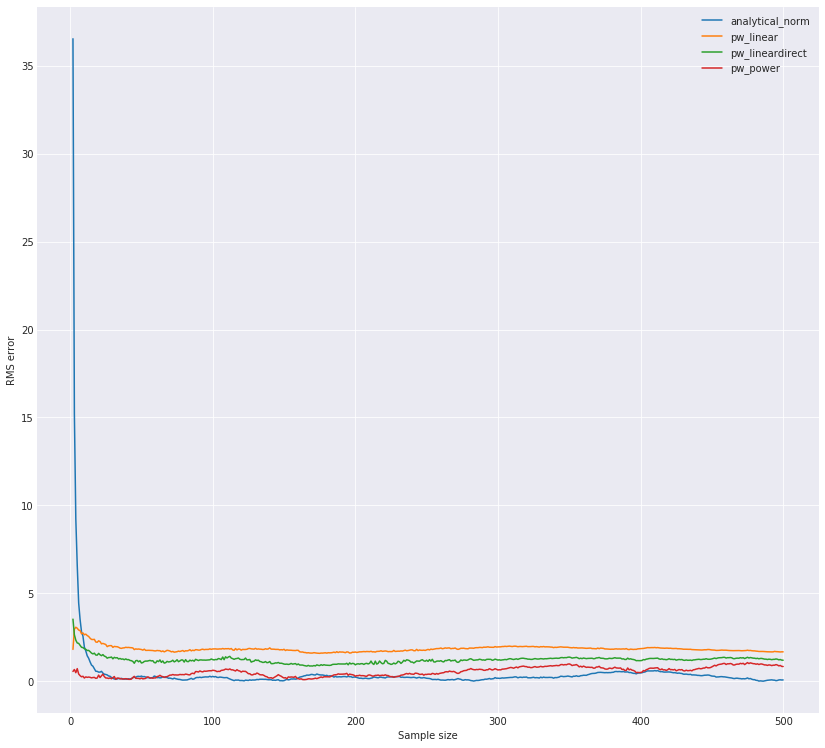

In [155]:
seaborn.set_style('darkgrid')
fig, ax = plt.subplots(1, figsize=(14,13))
for col in gumbel_rms_results:
    ax.plot(gumbel_rms_results.index, gumbel_rms_results[col], label=col)
ax.legend()
ax.set_ylabel('RMS error')
ax.set_xlabel('Sample size')


## In fit distros method, fit both power law and analytical normal, then choose one with best rms.

In [199]:
reload(peas.fitapproxdistros.distributions)
from peas.fitapproxdistros.distributions import *

In [200]:
from peas.fitapproxdistros import constants

In [201]:
import warnings
warnings.simplefilter('default')

In [202]:
def fit_distros(shuffled_samples, 
                empirical_distribution_class=peas.fitapproxdistros.distributions.PiecewiseApproxPower, 
                analytical_distribution_generator=scipy.stats.norm,
                interp_points=50,
                max_pvalue_std_error=constants.DEFAULT_MAX_PVALUE_SE, fit_kwargs={}):
    """
    Given a dictionary of permuted data vectors, return a dictionary of optimal parameters
    (as tuples) for distributions of class :param:`distro_class`.
    """
    sizes = sorted(shuffled_samples.keys())

    fit_params = {}
    for region_size in sizes:
        data = shuffled_samples[region_size]
        fit_param_sets = []
        print(region_size)
        
        # Get true empirical
        min_val, max_val = data.min(), data.max()
        data_mean = data.mean()
        endpoint = compute_empirical_quantile(data, 1 - compute_p_confidence(n=len(data)), is_sorted=True)

        if endpoint <= data_mean:
            raise ValueError(
                'Minimum data value that meets target p-value error threshold of {} is {}, which is below the mean of {}, therefore piecewise linear approximation will not work. Try generating more empirical samples or increasing the error tolerance.'.format(
                    max_pvalue_std_error, endpoint, initial_inflection_point))

        fit_xs = numpy.concatenate((numpy.linspace(min_val, data_mean, num=interp_points),
                                    numpy.linspace(data_mean, endpoint, num=interp_points)))
        
        empirical_logsf = numpy.log(compute_empirical_pvalue(data, 
                                                    values=fit_xs, tail='right', standard_approximation=True,
                                                    is_sorted=True))
        
        ## First do empirical:
        empirical_fit_params = empirical_distribution_class.fit_with_existing_empirical_logsf(fit_xs, empirical_logsf,
                                                                                           x0=(data.mean(), 1))                            
        empirical_distro = empirical_distribution_class(*empirical_fit_params)
        
        empirical_distro_points = empirical_distro.logsf(fit_xs)
        empirical_rms = rms(empirical_logsf, empirical_distro_points)
        
        ## Analytical:
        this_fit_params = analytical_distribution_generator.fit(data, **fit_kwargs)                            
        analytical_distro = analytical_distribution_generator(*this_fit_params)    

        analytical_distro_points = analytical_distro.logsf(fit_xs)
        analytical_rms = rms(empirical_logsf, analytical_distro_points)
        
#         if empirical_rms < analytical_rms:
        print(analytical_rms, empirical_rms)
        plt.plot(fit_xs, -10 * empirical_logsf, label='real')
        plt.plot(fit_xs, -10 * empirical_distro_points, label='empirical ({})'.format(empirical_rms))
        plt.plot(fit_xs, -10 * analytical_distro_points, label='analytical ({})'.format(analytical_rms))
        plt.suptitle(region_size)
        plt.legend()
        plt.show()

        fit_params[region_size] = this_fit_params
        log_print('size: {} empirical fit parameters: {}'.format(region_size, empirical_fit_params), 3)

#     return fit_params

2
3.082674507128524 0.04953598838927326


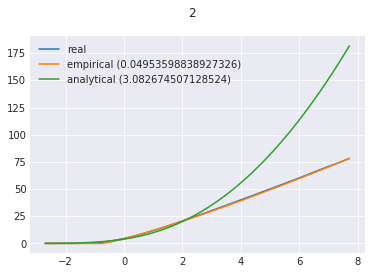

2018-Aug-29 18:07:44			size: 2 empirical fit parameters: (-0.7508905484504406, 1.189400313810841, -0.6159805656447889)
3
1.500005534136817 0.04412970697194822


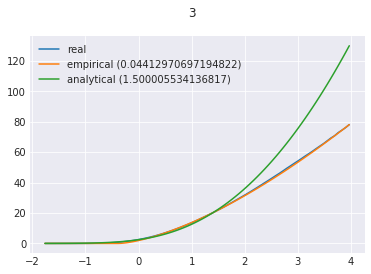

2018-Aug-29 18:07:45			size: 3 empirical fit parameters: (-0.3699053606711592, 1.507752257256547, -0.854671658763076)
4
0.9924168546841626 0.047928835734449914


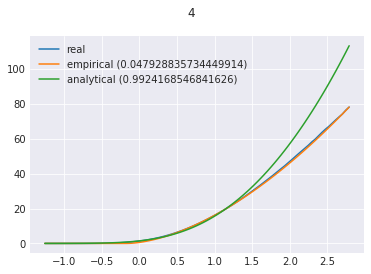

2018-Aug-29 18:07:46			size: 4 empirical fit parameters: (-0.16547462143301886, 1.696358350933634, -1.2453732927577463)
5
0.757144659353597 0.038055842726735505


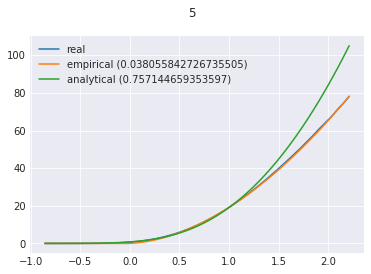

2018-Aug-29 18:07:47			size: 5 empirical fit parameters: (-0.034342362349263154, 1.813535104290225, -1.8024047632289402)
6
0.5672144181669622 0.024597279133315685


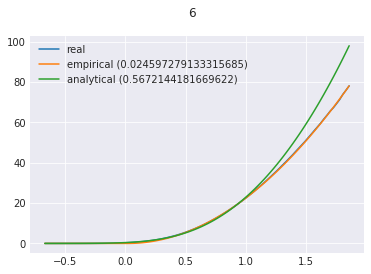

2018-Aug-29 18:07:48			size: 6 empirical fit parameters: (0.02315617220134831, 1.975906715331435, -2.3589939558595723)
7
0.4754616936249203 0.03576028108232787


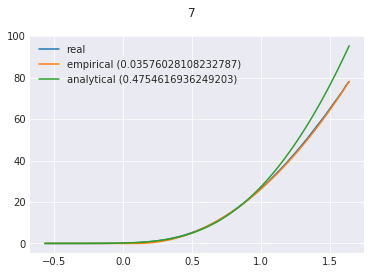

2018-Aug-29 18:07:49			size: 7 empirical fit parameters: (0.09763457913399062, 2.0390758487953984, -3.2278588400790666)
8
0.4112610707107155 0.020533097806955333


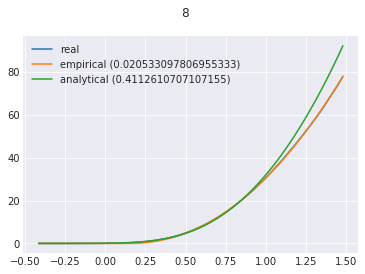

2018-Aug-29 18:07:50			size: 8 empirical fit parameters: (0.14612663131853293, 2.1037687076538845, -4.262112664925107)
9
0.37761624482070144 0.029999374353415775


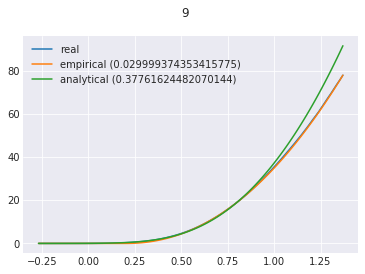

2018-Aug-29 18:07:51			size: 9 empirical fit parameters: (0.20031518004696858, 2.1107501186658157, -5.6089202415087565)
10
0.3152530685925654 0.019182401506261423


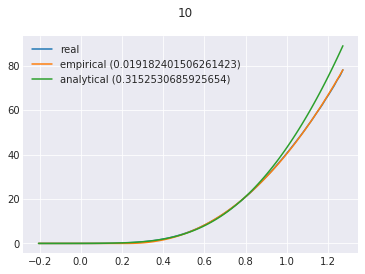

2018-Aug-29 18:07:52			size: 10 empirical fit parameters: (0.22020800934134377, 2.2056185960588843, -6.979377502041408)
11
0.28637214117057747 0.019742764971557077


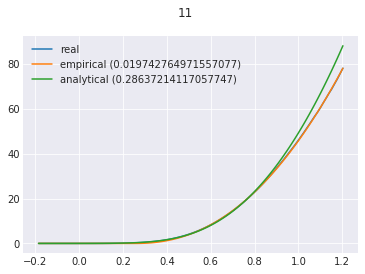

2018-Aug-29 18:07:53			size: 11 empirical fit parameters: (0.2535628705796974, 2.2219368130962676, -8.776099530067357)
12
0.2567177830155997 0.031205303839386297


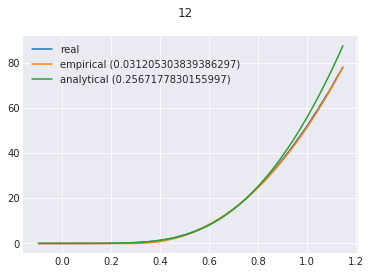

2018-Aug-29 18:07:54			size: 12 empirical fit parameters: (0.2795234147636571, 2.2486148879040604, -10.788502238862337)
13
0.2394223674176716 0.02396004040889531


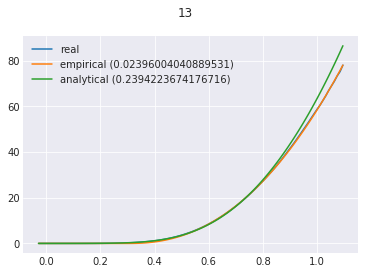

2018-Aug-29 18:07:55			size: 13 empirical fit parameters: (0.30566034286490296, 2.2463123839866515, -13.245023047300663)
14
0.2136227006583264 0.020721665136321878


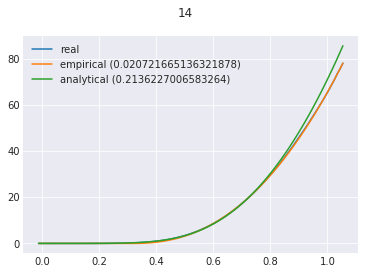

2018-Aug-29 18:07:56			size: 14 empirical fit parameters: (0.316949478516924, 2.3035325352763016, -15.758173094184464)
15
0.1991289394359091 0.021241905593501767


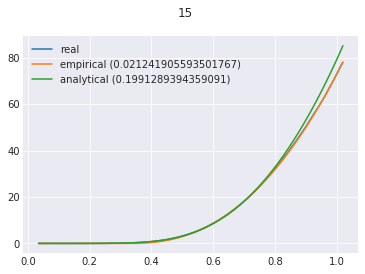

2018-Aug-29 18:07:57			size: 15 empirical fit parameters: (0.3321754820568786, 2.32612614882958, -18.668013670486634)
16
0.19373342412520628 0.032965781644297705


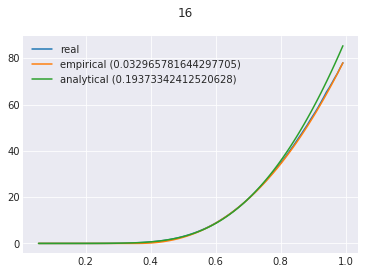

2018-Aug-29 18:07:58			size: 16 empirical fit parameters: (0.3537478799296301, 2.2974184000625764, -21.918437577482585)
17
0.17232010129887526 0.026386948311822186


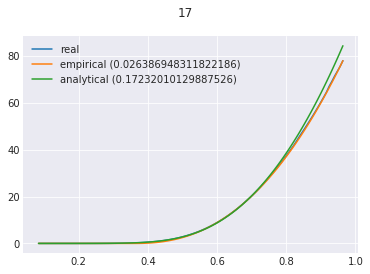

2018-Aug-29 18:07:59			size: 17 empirical fit parameters: (0.3595604414040102, 2.356652007674404, -25.600433268059906)
18
0.1586549522551178 0.01934627574014632


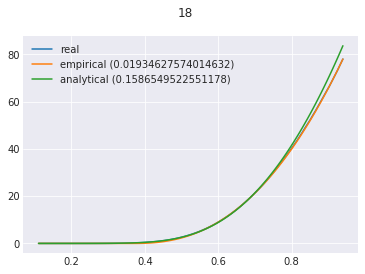

2018-Aug-29 18:08:00			size: 18 empirical fit parameters: (0.3690277261808741, 2.3832967705622754, -29.73731743795112)
19
0.15126164481146095 0.03547050375480002


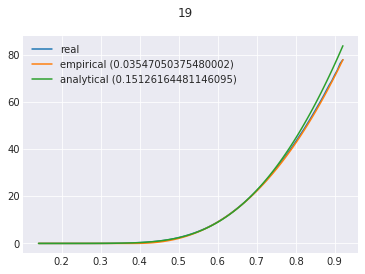

2018-Aug-29 18:08:01			size: 19 empirical fit parameters: (0.3804925731501193, 2.3873666508004865, -33.936778051377765)
20
0.14218222869679525 0.03520318772470919


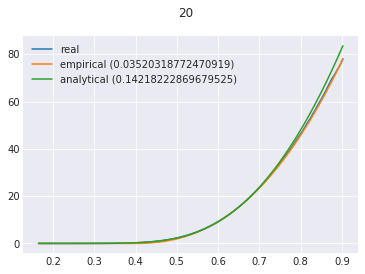

2018-Aug-29 18:08:02			size: 20 empirical fit parameters: (0.39136978479170303, 2.386782927483832, -38.75324969234813)
21
0.13741756249968118 0.0377559311900933


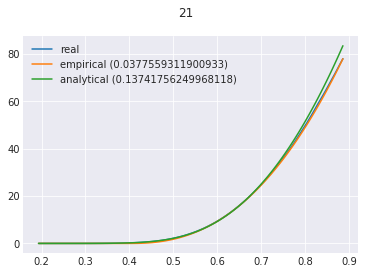

2018-Aug-29 18:08:03			size: 21 empirical fit parameters: (0.40099020976478217, 2.3849522957302787, -43.732182937168126)
22
0.1392128226196218 0.06294450927076527


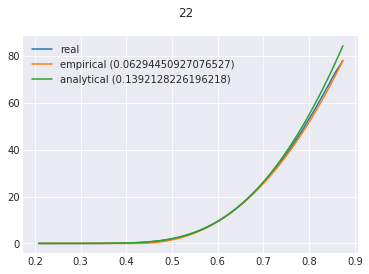

2018-Aug-29 18:08:03			size: 22 empirical fit parameters: (0.41405756466058186, 2.3459032381727223, -48.27290764631704)
23
0.1240344159504756 0.042310022277445826


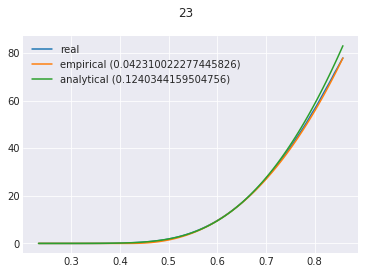

2018-Aug-29 18:08:04			size: 23 empirical fit parameters: (0.41577953850845356, 2.399664205205602, -55.1621306010166)
24
0.11678963633541548 0.03530508100465751


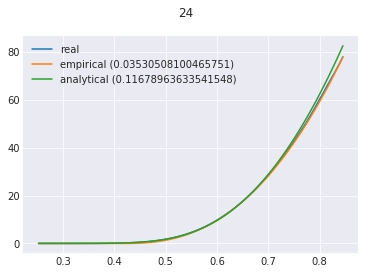

2018-Aug-29 18:08:05			size: 24 empirical fit parameters: (0.4205405662172588, 2.42238183675782, -62.030818552601566)
25
0.11199571007687477 0.036644628785207925


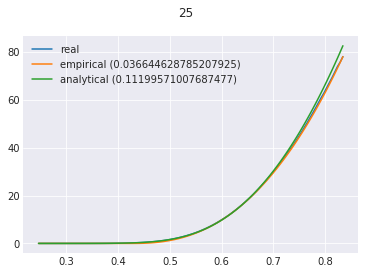

2018-Aug-29 18:08:06			size: 25 empirical fit parameters: (0.4257790999907209, 2.4348709071240484, -68.96704389227888)
26
0.11325198846721451 0.029507705140910247


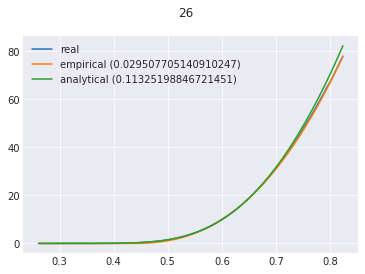

2018-Aug-29 18:08:07			size: 26 empirical fit parameters: (0.43280887773864246, 2.4222200545133354, -75.75097259642979)
27
0.10830138734602787 0.020483870611345056


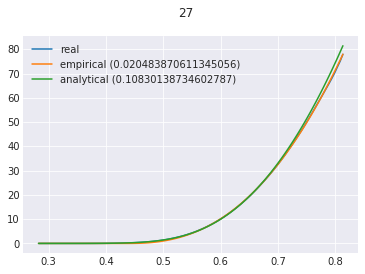

2018-Aug-29 18:08:08			size: 27 empirical fit parameters: (0.43729809437574946, 2.433468332361513, -84.41095040012486)
28
0.09599418712059116 0.02363282389133162


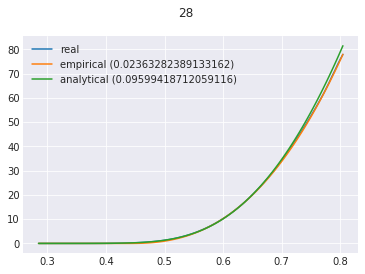

2018-Aug-29 18:08:09			size: 28 empirical fit parameters: (0.43766116106732944, 2.4912753009974424, -94.78277245970261)
29
0.08678783620422648 0.0169867542979575


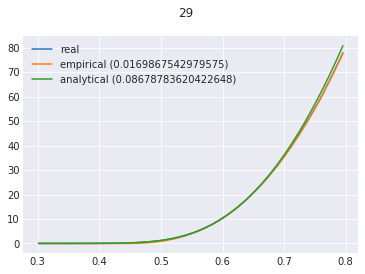

2018-Aug-29 18:08:10			size: 29 empirical fit parameters: (0.4405282658807916, 2.519119326609699, -105.90110681259884)
30
0.08185965623321802 0.01600961811641626


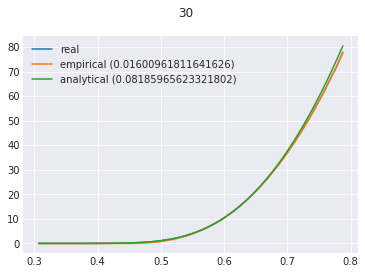

2018-Aug-29 18:08:11			size: 30 empirical fit parameters: (0.44475245674766867, 2.526776591767259, -116.416908237896)
31
0.07406147389647967 0.012971069617510404


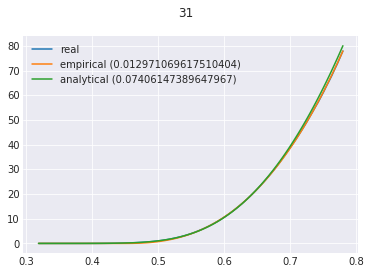

2018-Aug-29 18:08:12			size: 31 empirical fit parameters: (0.4450611691950204, 2.5792336190188965, -131.04239348323887)
32
0.06941032540429581 0.015756907504652983


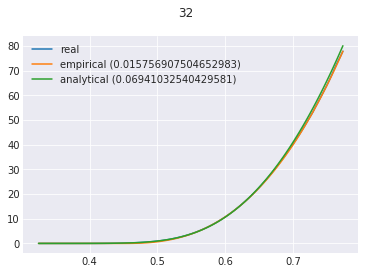

2018-Aug-29 18:08:13			size: 32 empirical fit parameters: (0.44698790210532147, 2.6105427752363566, -144.6800033730814)
33
0.07192618326772554 0.013383259549519322


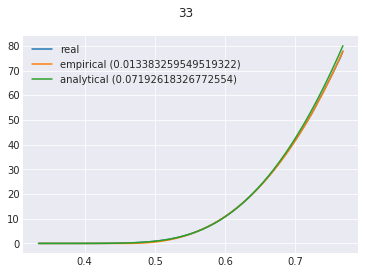

2018-Aug-29 18:08:14			size: 33 empirical fit parameters: (0.453445249076438, 2.5769381116445755, -154.06142966592523)
34
0.07781069941751488 0.018650779892937307


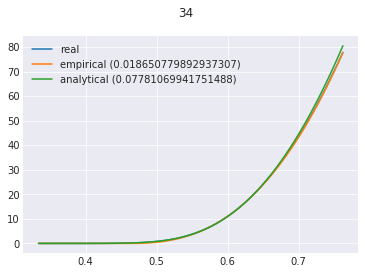

2018-Aug-29 18:08:15			size: 34 empirical fit parameters: (0.45912272833250845, 2.5463564103942007, -162.25648682947497)
35
0.07451255103783688 0.012559797828309918


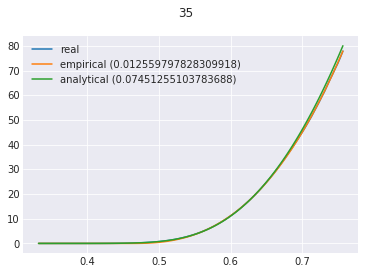

2018-Aug-29 18:08:16			size: 35 empirical fit parameters: (0.45974079900240383, 2.584666740488465, -180.08354965053798)
36
0.07569807251754761 0.015380352387054824


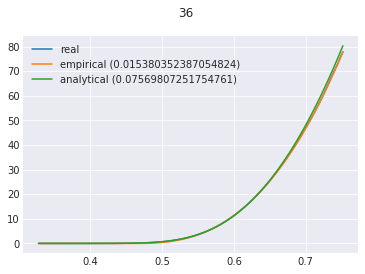

2018-Aug-29 18:08:17			size: 36 empirical fit parameters: (0.4633203856108867, 2.5794878460804243, -192.34331296148767)
37
0.07585817412755644 0.014067555764577756


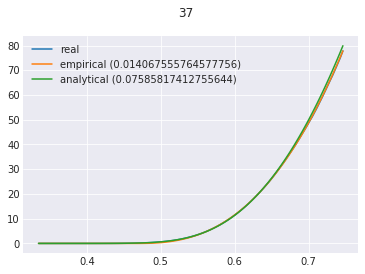

2018-Aug-29 18:08:18			size: 37 empirical fit parameters: (0.46640752369960503, 2.5788972325452817, -207.42820236756913)
38
0.07319398150234056 0.014241937295830396


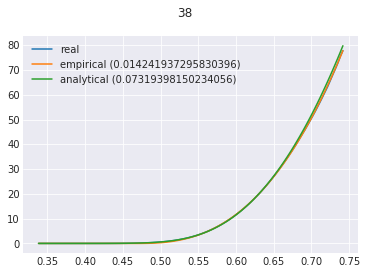

2018-Aug-29 18:08:19			size: 38 empirical fit parameters: (0.46804081038157364, 2.59960033724456, -225.91027015287057)
39
0.07342764607522038 0.01781389523342056


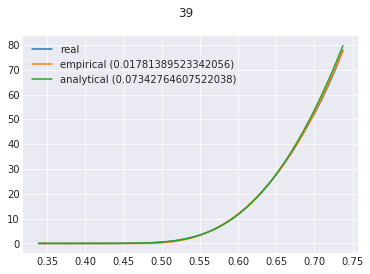

2018-Aug-29 18:08:20			size: 39 empirical fit parameters: (0.47152041297796793, 2.5890203353415, -240.43749102870044)
40
0.0753763044516435 0.015747674535449677


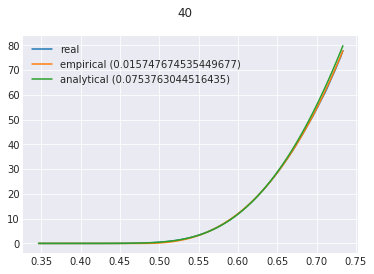

2018-Aug-29 18:08:21			size: 40 empirical fit parameters: (0.4753961437416188, 2.568894681499989, -252.3936936012528)
41
0.0736244601072815 0.01663992157077703


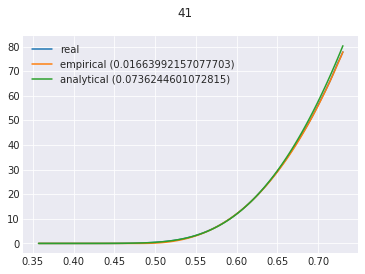

2018-Aug-29 18:08:22			size: 41 empirical fit parameters: (0.4784707130345513, 2.561629579015427, -266.35394451741934)
42
0.0727584214412713 0.012805527438494384


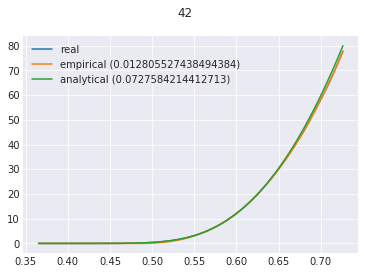

2018-Aug-29 18:08:23			size: 42 empirical fit parameters: (0.4808807659406379, 2.5611425171583653, -284.42829269134455)
43
0.07799776951291204 0.016152514531665337


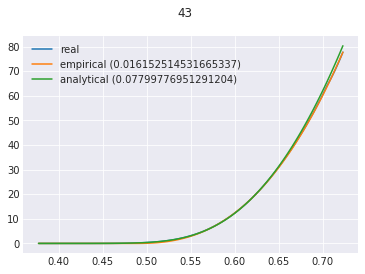

2018-Aug-29 18:08:24			size: 43 empirical fit parameters: (0.4855673084884691, 2.5181992439766168, -290.2942388241048)
44
0.08055668525008892 0.0217460804702029


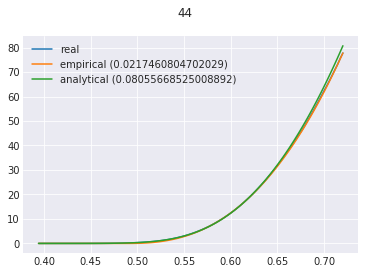

2018-Aug-29 18:08:25			size: 44 empirical fit parameters: (0.4884045249706169, 2.504687705339963, -302.85942327004943)
45
0.08399937681289026 0.03088579304309056


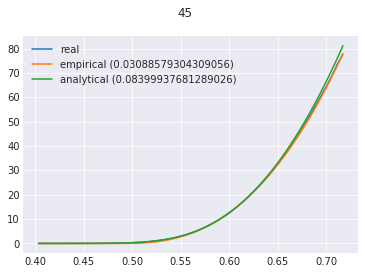

2018-Aug-29 18:08:26			size: 45 empirical fit parameters: (0.49168972555191215, 2.4807040758027608, -312.1233095148276)
46
0.08414578830815184 0.022871020412148512


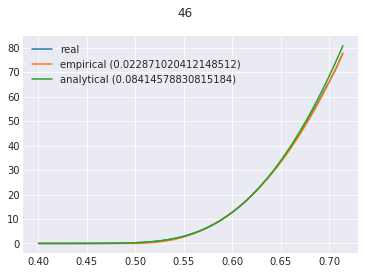

2018-Aug-29 18:08:27			size: 46 empirical fit parameters: (0.49404551048873085, 2.471273746955515, -328.00850928843204)
47
0.08405571603170164 0.035441719140345516


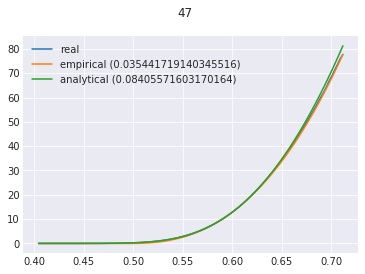

2018-Aug-29 18:08:28			size: 47 empirical fit parameters: (0.49581334926149057, 2.4716734559010334, -344.29624742216384)
48
0.08803258332256231 0.03162568091801861


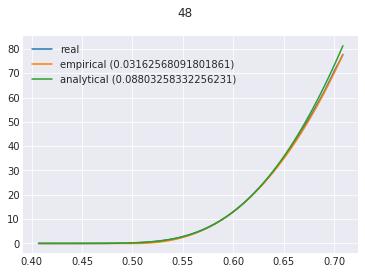

2018-Aug-29 18:08:29			size: 48 empirical fit parameters: (0.49859584932756973, 2.449054477669802, -354.5381916333641)
49
0.08997608530556801 0.02271967403883157


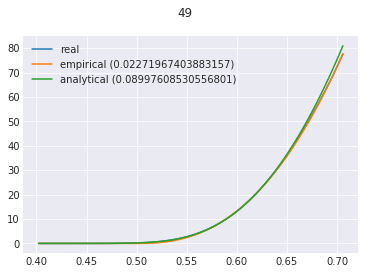

2018-Aug-29 18:08:30			size: 49 empirical fit parameters: (0.5009967598168963, 2.4316056825935806, -367.3449679007154)
50
0.0941907263724927 0.026981494863048166


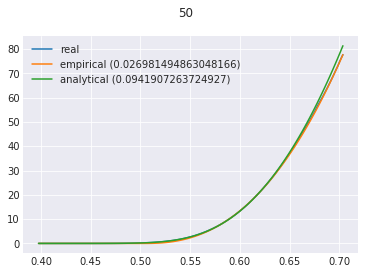

2018-Aug-29 18:08:31			size: 50 empirical fit parameters: (0.5039789728027798, 2.4012538120887648, -372.5901324351908)
51
0.09268173787226938 0.02308270934553334


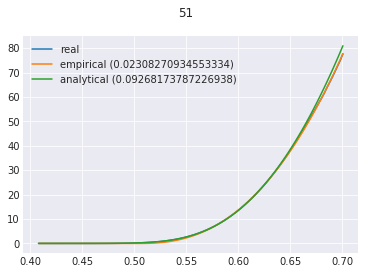

2018-Aug-29 18:08:32			size: 51 empirical fit parameters: (0.5056281255567477, 2.3978593251994043, -391.47970244570945)
52
0.0891952888387209 0.02716554462908268


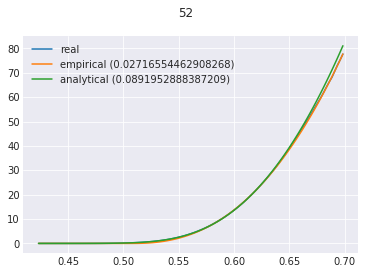

2018-Aug-29 18:08:33			size: 52 empirical fit parameters: (0.5069931298900815, 2.4014954617736732, -412.1178710597261)
53
0.0864766613504009 0.02622716496441857


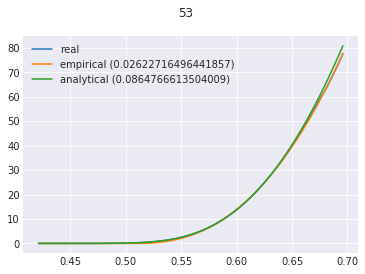

2018-Aug-29 18:08:34			size: 53 empirical fit parameters: (0.5086693977411936, 2.3959550793683073, -430.3369276854617)
54
0.07868827484731061 0.026003127866623198


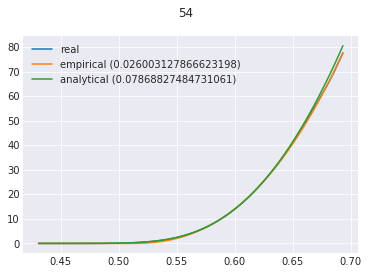

2018-Aug-29 18:08:35			size: 54 empirical fit parameters: (0.5090149858302523, 2.420444706186181, -465.19578908959505)
55
0.07302504206016847 0.028543804492148002


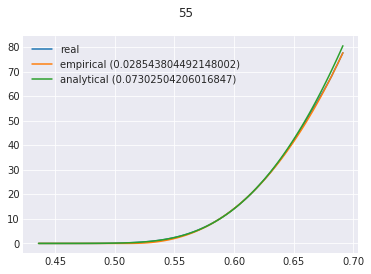

2018-Aug-29 18:08:36			size: 55 empirical fit parameters: (0.5098161658220979, 2.434153869304503, -495.35528673030876)
56
0.06926156407340998 0.027123197436081593


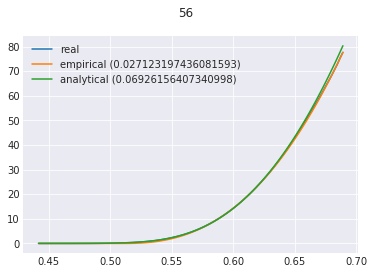

2018-Aug-29 18:08:37			size: 56 empirical fit parameters: (0.5104253846459933, 2.4491019347706953, -528.0426137927221)
57
0.06967583881556186 0.030045641732598893


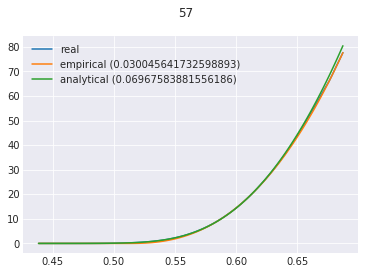

2018-Aug-29 18:08:38			size: 57 empirical fit parameters: (0.5120682673885922, 2.4383526306460044, -544.0309410219573)
58
0.06764091977035444 0.033216636912968084


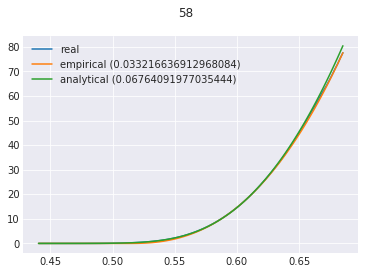

2018-Aug-29 18:08:39			size: 58 empirical fit parameters: (0.5133071671149272, 2.437408431240461, -567.4325851208146)
59
0.0738948101761506 0.054363876790054146


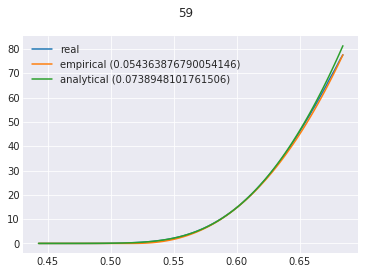

2018-Aug-29 18:08:40			size: 59 empirical fit parameters: (0.5160973040016756, 2.3965316647933648, -557.7900779081897)
60
0.06819602626751146 0.051213855784280025


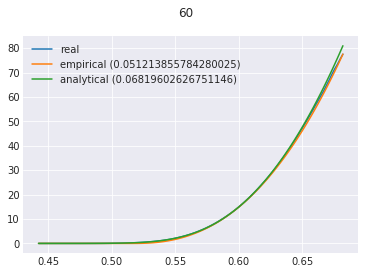

2018-Aug-29 18:08:41			size: 60 empirical fit parameters: (0.5162622404931096, 2.4188165339629166, -599.1359075899053)
61
0.06059178754208786 0.03646871518682384


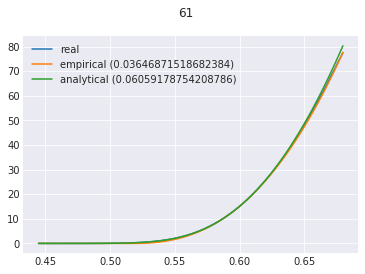

2018-Aug-29 18:08:42			size: 61 empirical fit parameters: (0.5160742850293426, 2.449888749146299, -653.8471248933872)
62
0.057984448964428524 0.04514997432737227


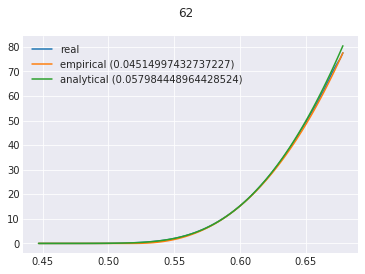

2018-Aug-29 18:08:43			size: 62 empirical fit parameters: (0.5168043835933549, 2.4588147594012106, -688.0357488385026)
63
0.05653299970731938 0.037134626636070873


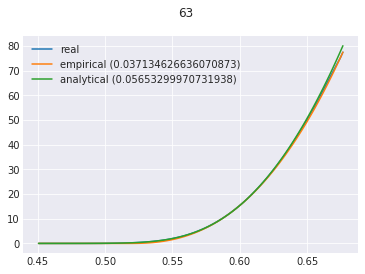

2018-Aug-29 18:08:44			size: 63 empirical fit parameters: (0.5176325898767874, 2.462358926591344, -721.5478843008094)
64
0.05649872017012142 0.041561448835130424


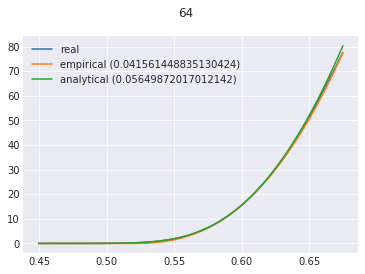

2018-Aug-29 18:08:45			size: 64 empirical fit parameters: (0.5188944604751934, 2.454100328203058, -741.383253264689)
65
0.06002606180253516 0.05269667407285516


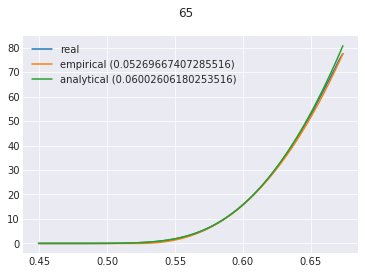

2018-Aug-29 18:08:46			size: 65 empirical fit parameters: (0.5207455903654823, 2.4287885727499092, -741.7794331625585)
66
0.06226374770700992 0.048400451229375134


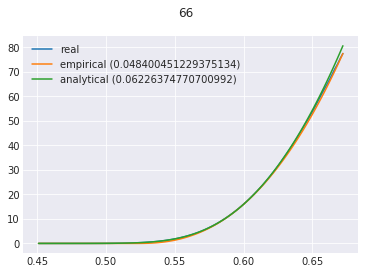

2018-Aug-29 18:08:46			size: 66 empirical fit parameters: (0.5225022077256452, 2.404783810991307, -747.0550127876745)
67
0.060430708780299644 0.04313753838980925


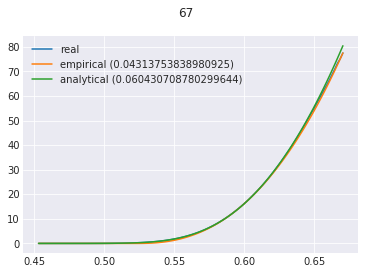

2018-Aug-29 18:08:47			size: 67 empirical fit parameters: (0.5233639574444976, 2.4044137851885603, -777.0107939362986)
68
0.05644676924258487 0.04601265064793277


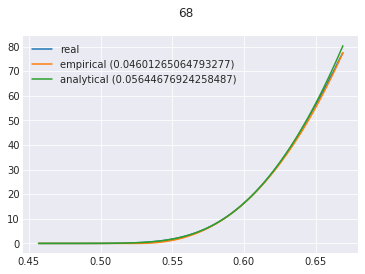

2018-Aug-29 18:08:48			size: 68 empirical fit parameters: (0.5239177508118567, 2.4136012082665257, -817.163919456563)
69


In [ ]:
fit_distros(shuffled_means_ground_truth)

In [144]:
fit_xs, fit_ys = peas.fitapproxdistros.distributions.PiecewiseApproxPower._compute_empirical_pscores(data, is_sorted=True)

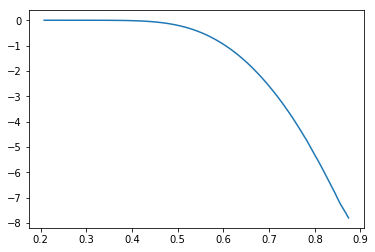

In [145]:
plt.plot(fit_xs, fit_ys)

In [146]:
pred_ys = peas.fitapproxdistros.distributions.PiecewiseApproxPower(data.mean(), 1, -1).logsf(fit_xs)

In [147]:
scipy.stats.pearsonr(fit_ys, pred_ys)

(0.9925913590809794, 1.5742229958385596e-91)

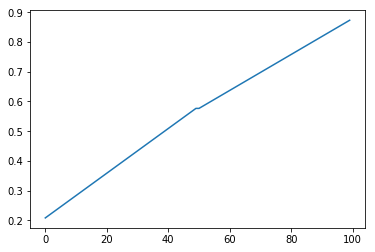

In [148]:
plt.plot(fit_xs, )

In [181]:
data = shuffled_means_ground_truth[12]
peas.fitapproxdistros.distributions.PiecewiseApproxPower.fit(data)

(-7.810589194420114, 28.725318311946122, -3.487187306957345e-27)

In [ ]:
def rms(X, Y):
    return numpy.sqrt(numpy.mean((X - Y)**2))

In [183]:
min_val, max_val = data.min(), data.max()
data_mean = data.mean()
endpoint = compute_empirical_quantile(data, 1 - compute_p_confidence(n=len(data)), is_sorted=True)

if endpoint <= data_mean:
    raise ValueError(
        'Minimum data value that meets target p-value error threshold of {} is {}, which is below the mean of {}, therefore piecewise linear approximation will not work. Try generating more empirical samples or increasing the error tolerance.'.format(
            max_pvalue_std_error, endpoint, initial_inflection_point))

fit_xs = numpy.concatenate((numpy.linspace(min_val, data_mean, num=50),
                            numpy.linspace(data_mean, endpoint, num=50)))
fit_ys = numpy.log(compute_empirical_pvalue(data, values=fit_xs, tail='right', is_sorted=True))

## Show where empirical sampling tops out

## Make q-q plots (and use to determine when to switch to analytical normal)

## Make argument for empirical distribution from kurtosis